# Sharp and smooth inversions of Devon’s data on saprolite
This notebook compare a smooth and a sharp inversion for estimating the interface between the top soil and the saprolite (regolith) beneath. The dataset was collected at North Wyke Research station (Rothamsted Research) in Devon (UK). True depth of to the saprolite were obtained by coring.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append('../src') # add path where emagpy is
from emagpy import Problem

datadir = 'examples/'

In [11]:
k1 = Problem()
k1.createSurvey(datadir + 'saprolite/mexpl.csv')
k1.setInit(depths0=np.linspace(0.05, 2, 10))
k1.invert(forwardModel='CSgn')

k2 = Problem()
k2.createSurvey(datadir + 'saprolite/mexpl.csv')
k2.setInit(depths0=np.array([0.5]), fixedDepths=[False], conds0=[15, 7])
k2.invert(method='ROPE', forwardModel='CS', bnds=[(0.2, 0.7), (10,25), (0,15)], njobs=-1)

  0%|          | 0/30 [00:00<?, ?it/s]

Survey 1/1
30/30 inverted
Survey 1/1


100%|██████████| 30/30 [00:04<00:00,  7.43it/s]


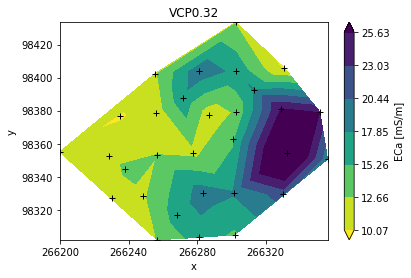

In [12]:
fig, ax = plt.subplots()
k1.showMap(contour=True, pts=True, ax=ax)
ax.xaxis.set_major_locator(plt.MaxNLocator(5))

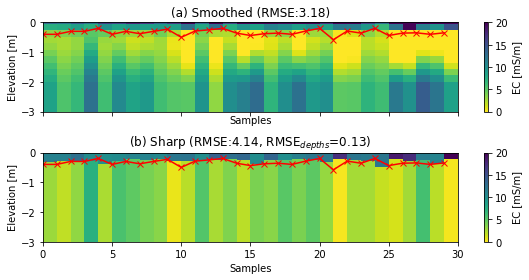

In [13]:
# figure
fig, axs = plt.subplots(2, 1, figsize=(8,4), sharex=True, sharey=True)
ax = axs[0]
k1.showResults(ax=ax, vmin=0, vmax=20, maxDepth=3)
rmse = k1.getRMSE()['all'].values[0]
ax.set_title('(a) Smoothed (RMSE:{:.2f})'.format(rmse))
ax.plot(-k1.surveys[0].df['saproliteDepth'], 'rx-')
ax = axs[1]
k2.showResults(ax=ax, vmin=0, vmax=20, maxDepth=3)
rmse = k2.getRMSE()['all'].values[0]
trueDepths = k2.surveys[0].df['saproliteDepth'].values
rmseDepths = np.sqrt(np.sum((k2.depths[0][:,0] - trueDepths)**2)/len(trueDepths))
ax.set_title('(b) Sharp (RMSE:{:.2f}, RMSE$_{{depths}}$={:.2f})'.format(rmse, rmseDepths))
ax.plot(-k1.surveys[0].df['saproliteDepth'], 'rx-')